In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'hr_data.csv')

In [5]:
for column in data.columns:
    print(column,data[column].isna().sum())

satisfaction_level 0
last_evaluation 0
number_project 0
average_montly_hours 368
time_spend_company 151
work_accident 0
left 0
promotion_last_5years 0
is_smoker 14764
department 0
salary 0


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [5]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [6]:
print('Number of rows')
print(data.shape[0])

Number of rows
14999


In [7]:
print('Number of columns')
print(data.shape[1])

Number of columns
11


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14631 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   is_smoker              235 non-null    object 
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


In [9]:
data.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

In [10]:
#Handling Missing Data

In [11]:
data['is_smoker'].value_counts()

no     180
yes     55
Name: is_smoker, dtype: int64

In [12]:
data.groupby('is_smoker')['left'].agg('count')

is_smoker
no     180
yes     55
Name: left, dtype: int64

In [13]:
data.loc[~data['is_smoker'].isnull()]['left'].value_counts()

no     187
yes     48
Name: left, dtype: int64

In [14]:
data.groupby(['is_smoker','left'])['left'].agg('count')

is_smoker  left
no         no      139
           yes      41
yes        no       48
           yes       7
Name: left, dtype: int64

In [15]:
7/48

0.14583333333333334

In [16]:
41/139

0.2949640287769784

In [17]:
data.drop('is_smoker',inplace=True,axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14631 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.1+ MB


In [19]:
data.isna().sum()

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours     368
time_spend_company       151
work_accident              0
left                       0
promotion_last_5years      0
department                 0
salary                     0
dtype: int64

In [20]:
data['average_montly_hours'].value_counts()

135.0    152
156.0    152
151.0    146
149.0    143
160.0    134
        ... 
297.0      7
299.0      6
96.0       6
288.0      6
303.0      6
Name: average_montly_hours, Length: 215, dtype: int64

In [21]:
avg_month_hours=data['average_montly_hours'].mean()

In [22]:
avg_month_hours

200.95837605085094

In [23]:
data['average_montly_hours'].fillna(avg_month_hours,inplace=True)

In [24]:
data.isna().sum()

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company       151
work_accident              0
left                       0
promotion_last_5years      0
department                 0
salary                     0
dtype: int64

In [25]:
time_spend_company_mode=data['time_spend_company'].mode()[0]

In [26]:
time_spend_company_mode

3.0

In [27]:
data['time_spend_company']=data['time_spend_company'].fillna(time_spend_company_mode)

In [28]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [29]:
data['time_spend_company'].value_counts()

3.0     6534
2.0     3227
4.0     2525
5.0     1450
6.0      707
10.0     212
7.0      186
8.0      158
Name: time_spend_company, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.1+ MB


In [31]:
data['left'].value_counts()

no     11428
yes     3571
Name: left, dtype: int64

In [32]:
data['left']=data['left'].apply(lambda x: 1 if x=='yes' else 0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [34]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
onehot_encoder=OneHotEncoder()

In [8]:
categorical_columns=[column for column in data.columns if data[column].dtype=='object']

In [9]:
categorical_columns

['left', 'is_smoker', 'department', 'salary']

In [37]:
department_encoded=pd.get_dummies(data['department'])

In [38]:
department_encoded

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [39]:
data=pd.concat([data,department_encoded],axis=1)

In [40]:
data.drop('department',inplace=True,axis=1)

In [41]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [42]:
salary_onehot=OneHotEncoder()

In [43]:
salary_encoded=pd.get_dummies(data['salary'])

In [44]:
data=pd.concat([data,salary_encoded],axis=1)

In [45]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical', 'high', 'low', 'medium'],
      dtype='object')

In [46]:
data.drop('salary',axis=1,inplace=True)

In [47]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,200.958376,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   IT                     14999 non-null  uint8  
 9   RandD                  14999 non-null  uint8  
 10  accounting             14999 non-null  uint8  
 11  hr                     14999 non-null  uint8  
 12  management             14999 non-null  uint8  
 13  marketing              14999 non-null  uint8  
 14  product_mng            14999 non-null  uint8  
 15  sa

In [49]:
X=data.drop('left',axis=1)
y=data['left']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def train_model(models,X_train,y_train,X_test,y_test):
    for modelparams in models:
        print('***********',modelparams['Name'],'*******************')
        model=modelparams['model']
        model.fit(X_train,y_train)
        
        train_predict=model.predict(X_train)
        print('*******Training Accuracy***************')
        print(accuracy_score(y_train,train_predict))
        print('*******Testing Accuracy****************')
        test_predict=model.predict(X_test)
        print(accuracy_score(y_test,test_predict))
        
        print('********Confusion Matrix***************')
        cn_matrix=confusion_matrix(y_test,test_predict)
        sns.heatmap(cn_matrix,annot=True)
        plt.show()
        
        print('*********Classification Report*********')
        print(classification_report(y_test,test_predict))
        print('----------------------------------------')
        print('========================================')

In [70]:
models=[{'Name':'LogisticRegression','model':LogisticRegression()},
       {'Name':'RandomForestClassifier','model':RandomForestClassifier()},
       {'Name':'DecisionTreeClassifier','model':DecisionTreeClassifier()}]

*********** LogisticRegression *******************
*******Training Accuracy***************
0.7944566149157063
*******Testing Accuracy****************
0.7853333333333333
********Confusion Matrix***************


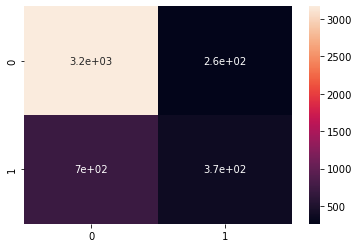

*********Classification Report*********
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.58      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

----------------------------------------
*********** RandomForestClassifier *******************
*******Training Accuracy***************
1.0
*******Testing Accuracy****************
0.9837777777777778
********Confusion Matrix***************


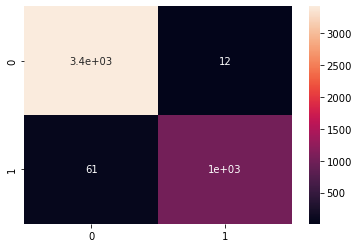

*********Classification Report*********
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.94      0.97      1072

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500

----------------------------------------
*********** DecisionTreeClassifier *******************
*******Training Accuracy***************
1.0
*******Testing Accuracy****************
0.9686666666666667
********Confusion Matrix***************


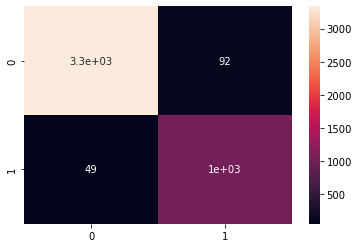

*********Classification Report*********
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3428
           1       0.92      0.95      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

----------------------------------------


In [71]:
train_model(models,X_train,y_train,X_test,y_test)

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr_train_predict=lr.predict(X_train)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_train,lr_train_predict)

0.7944566149157063

In [59]:
lr_test_predict=lr.predict(X_test)

In [60]:
accuracy_score(y_test,lr_test_predict)

0.7853333333333333

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,lr_test_predict)

array([[3167,  261],
       [ 705,  367]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,lr_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.58      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

